In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# 1. Data Preprocessing


In [3]:
df = pd.read_csv('finaldata.csv')

In [4]:
df.sample(10)

,labels,text
5504,ham,इंतजार करें. मैं &lt;#gt; मि.
5402,ham,हाय यह अच्छी तरह से जाने के लिए मेरा शुक्रिया!
1813,ham,टिकट 4 wapapapapapapappappppap प्राप्त कर रही ...
1524,ham,एक्स से ठीक है...
3257,ham,वे लोग कौन थे? क्या आप एक यात्रा में थे? मैंने...
2078,ham,Hannonks उसे मिलता है 2 बजे उसे मिलता है। वह च...
5453,ham,सिवाय एक लड़की के साथ बड़े obs.
4846,ham,आप भी गायब हो गई.
1456,spam,Yr क्षेत्र में सेक्सी के साथ एक गपशप या इश्वर ...
1335,ham,"ओह! एक आधा घंटे कनाडा से अधिक हो गया है, ना? व..."


In [5]:
df.shape

(5572, 2)

In [6]:
df.info

<bound method DataFrame.info of      labels                                               text
0       ham  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...
1       ham                         ओके लामर.... if if uue पर.
2      spam  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...
3       ham  Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...
4       ham  नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...
...     ...                                                ...
5567   spam  यह 2 सेकंड है जब हमने 2 संपर्क की कोशिश की है....
5568    ham      क्या कलाई घर का पता लगाने के लिए जा रही होगी?
5569    ham                      तो फिर, दूसरे सुझाव क्या हैं?
5570    ham  आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और ख...
5571    ham                     उसकी पीठ के नाम पर इसकी सच्चाई

[5572 rows x 2 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

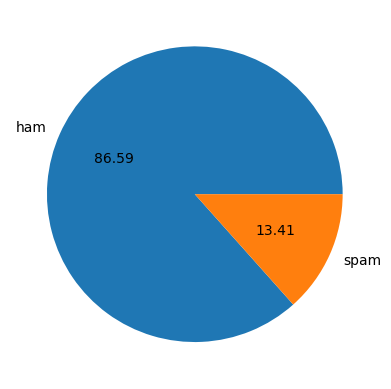

In [7]:
#plotting
plt.pie(df['labels'].value_counts(), labels = ['ham', 'spam'], autopct="%0.2f")
plt.show

In [8]:
# Split the dataset into input (SMS messages) and target (spam or not)

texts = df['text'].astype(str).values
labels = df['labels'].map({'ham': 0, 'spam': 1}).values
print('Texts:',texts)
print('Labels:',labels)

Texts: ['Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान विश्व cag में उपलब्ध है... वहाँ एक अधिक wack मिला...'
 'ओके लामर.... if if uue पर.'
 'Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प्रविष्टि में. पाठ FAO को 87121 में प्रविष्टि प्राप्त करने के लिए(stibook दर) TTVERVE है 0. 08375750818 के मूल्य लागू करता है'
 ... 'तो फिर, दूसरे सुझाव क्या हैं?'
 'आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और खरीदने में दिलचस्पी की तरह काम किया और वह हमें मुक्त करने के लिए दे दिया'
 'उसकी पीठ के नाम पर इसकी सच्चाई']
Labels: [0 0 1 ... 0 0 0]


In [9]:
#Tokenization and Padding
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post')
print(padded_sequences)


[[  1 816  78 ...   0   0   0]
 [  1 515   1 ...   0   0   0]
 [  1 887   1 ...   0   0   0]
 ...
 [ 32  60 413 ...   0   0   0]
 [161  41   1 ...   0   0   0]
 [392   1   3 ...   0   0   0]]


# 2. Model 


In [10]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length = padded_sequences.shape[1]))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation ='sigmoid'))

In [11]:
#model compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
#Train_test_split
train_size = int(0.8 * len(padded_sequences))
train_texts = padded_sequences[:train_size]
train_labels = labels[:train_size]
test_texts = padded_sequences[train_size:]
test_labels = labels[train_size:]

In [13]:
#Training the model
epochs = 10 
batch_size = 32
history = model.fit(train_texts, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_texts, test_labels))

Epoch 1/10


2023-06-24 02:11:22.797481: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


140/140 [==============================] - 14s 91ms/step - loss: 0.2859 - accuracy: 0.9035 - val_loss: 0.1389 - val_accuracy: 0.9596
Epoch 2/10
140/140 [==============================] - 12s 85ms/step - loss: 0.1096 - accuracy: 0.9672 - val_loss: 0.0916 - val_accuracy: 0.9722
Epoch 3/10
140/140 [==============================] - 12s 85ms/step - loss: 0.0821 - accuracy: 0.9773 - val_loss: 0.0938 - val_accuracy: 0.9749
Epoch 4/10
140/140 [==============================] - 12s 86ms/step - loss: 0.0667 - accuracy: 0.9809 - val_loss: 0.1223 - val_accuracy: 0.9695
Epoch 5/10
140/140 [==============================] - 12s 87ms/step - loss: 0.0570 - accuracy: 0.9847 - val_loss: 0.0940 - val_accuracy: 0.9740
Epoch 6/10
140/140 [==============================] - 12s 85ms/step - loss: 0.0480 - accuracy: 0.9895 - val_loss: 0.1144 - val_accuracy: 0.9623
Epoch 7/10
140/140 [==============================] - 12s 85ms/step - loss: 0.0473 - accuracy: 0.9890 - val_loss: 0.1127 - val_accuracy: 0.9722
Epo

# 3. Evaluating the Model

In [14]:
loss, accuracy = model.evaluate(test_texts, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

35/35 [==============================] - 1s 22ms/step - loss: 0.1483 - accuracy: 0.9578
Test Loss: 0.1482544094324112
Test Accuracy: 0.957847535610199


In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

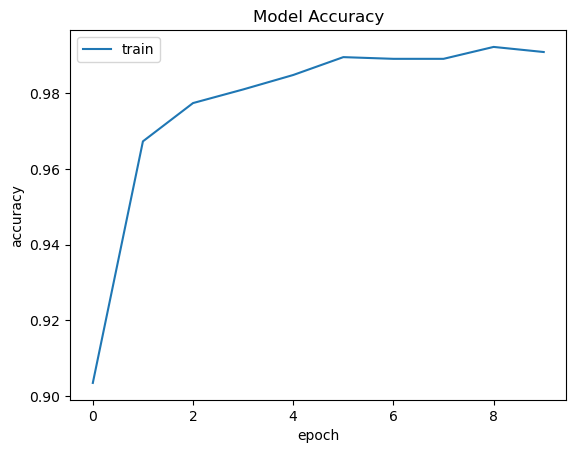

In [16]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

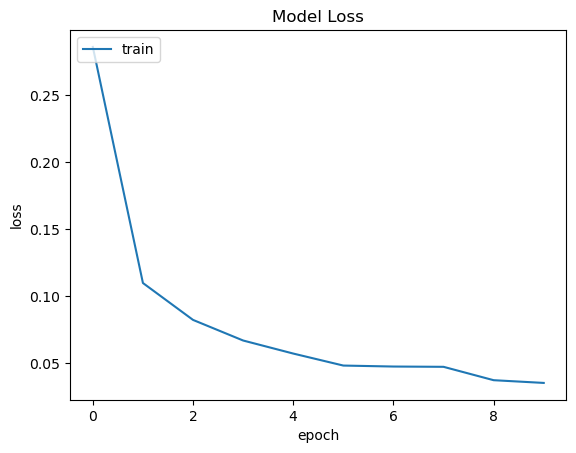

In [17]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

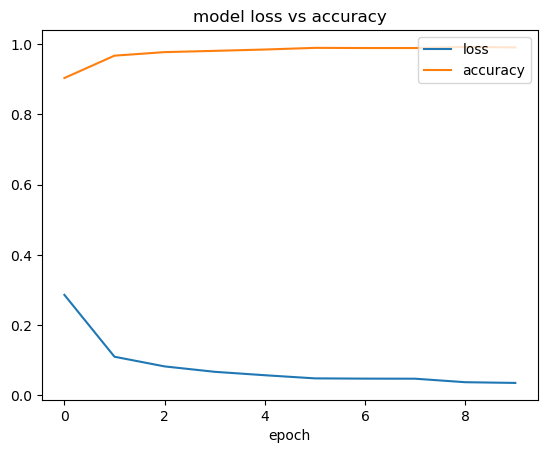

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show() 

In [19]:

# Take user input
user_input = input("Enter a message: ")

# Preprocess the user input
user_sequence = tokenizer.texts_to_sequences([user_input])
user_padded_sequence = pad_sequences(user_sequence, padding='post', maxlen=padded_sequences.shape[1])

# Make prediction on user input
prediction = model.predict(user_padded_sequence)

# Interpret the prediction
if prediction >= 0.5:
    print("The message is predicted as spam.")
else:
    print("The message is predicted as not spam.")


Enter a message: हैलो बेटे , आप ने रात का भोजन खा लिया मुझे तुम्हारी बहुत याद आ रही है
1/1 [==============================] - 0s 247ms/step
The message is predicted as not spam.


In [21]:


# Load and preprocess the real-world data
real_data = pd.read_csv('realdata.csv')
real_texts = real_data['text'].astype(str).values
real_sequences = tokenizer.texts_to_sequences(real_texts)
real_padded_sequences = pad_sequences(real_sequences, padding='post')

# Make predictions on the real-world data
predictions = model.predict(real_padded_sequences)

# Interpret the predictions
for i, prediction in enumerate(predictions):
    if prediction >= 0.5:
        print(f"Message '{i}' is predicted as spam.")
    else:
        print(f"Message '{i}' is predicted as not spam.")


1/1 [==============================] - 0s 12ms/step
Message '0' is predicted as spam.
Message '1' is predicted as spam.
Message '2' is predicted as spam.
Message '3' is predicted as spam.
Message '4' is predicted as not spam.
Message '5' is predicted as spam.
Message '6' is predicted as not spam.
Message '7' is predicted as spam.
Message '8' is predicted as not spam.
Message '9' is predicted as spam.
Message '10' is predicted as spam.
Message '11' is predicted as not spam.
Message '12' is predicted as not spam.
Message '13' is predicted as spam.
Message '14' is predicted as not spam.
Message '15' is predicted as spam.
Message '16' is predicted as not spam.
Message '17' is predicted as not spam.
Message '18' is predicted as spam.
Message '19' is predicted as not spam.
Message '20' is predicted as spam.
Message '21' is predicted as spam.
Message '22' is predicted as not spam.
Message '23' is predicted as not spam.
Message '24' is predicted as not spam.
Message '25' is predicted as not sp